# Analysis - Movie Subset of Netflix Data

Enhanced by Rotten Tomatoes Dataset

#### Import Libraries

In [52]:
import pandas as pd
import plotly.express as px

Create DataFrame from Netflix CSV, filtered to just movies

Create DataFrame from Rotten Tomatoes Movies CSV

In [63]:
netflix_movies_df = pd.read_csv('./data/netflix-titles.csv', parse_dates=['date_added'])
netflix_movies_df = netflix_movies_df[netflix_movies_df["type"] == 'Movie']
rotten_movies_df = pd.read_csv('./data/rotten_tomatoes_movies.csv')
rotten_movies_df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


Extract release_year from Rotten Tomatoes original_release_date

In [54]:
rotten_movies_df["release_year"] = rotten_movies_df["original_release_date"].str.split('-').str[0]

Add Unique identifier column to both DataFrames for merging

In [55]:
def combine_title_and_year_columns(dataframe, title_column, year_column, output_column):
  dataframe[output_column] = dataframe[title_column].str.lower() + " " + netflix_movies_df[year_column].astype(str)

netflix_movies_df["title_and_release_year"] = netflix_movies_df["title"].str.lower() + " " + netflix_movies_df["release_year"].astype(str)
# combine_columns(netflix_movies_df, "title", "release_year", output_column="title_and_release_year")
rotten_movies_df["title_and_release_year"] = rotten_movies_df["movie_title"].str.lower() + " " + rotten_movies_df["release_year"].astype(str)
# combine_columns(rotten_movies_df, "movie_title", "release_year", output_column="title_and_release_year")

Merge the above datasets, returning only those that exist in both sets

In [56]:
netflix_plus_rt_df = pd.merge(netflix_movies_df, rotten_movies_df, how="inner", on="title_and_release_year")
after_manual_join = netflix_plus_rt_df["title"].count()
netflix_plus_rt_df.describe()

,release_year_x,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,1252.000000,1232.000000,1251.000000,1251.000000,1248.000000,1.248000e+03,1252.000000,1252.000000,1252.000000
mean,2008.528754,107.604708,59.055156,102.459632,61.138622,4.664194e+05,24.381789,64.581470,37.818690
std,11.077374,20.597857,28.775451,85.067835,20.222044,3.310599e+06,17.706812,71.982482,39.504686
min,1954.000000,40.000000,0.000000,5.000000,8.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,2004.000000,93.000000,35.000000,30.500000,46.000000,1.461500e+03,8.000000,13.000000,7.000000
50%,2012.000000,103.000000,63.000000,80.000000,63.000000,2.680450e+04,21.000000,39.000000,22.000000
75%,2017.000000,118.000000,85.500000,158.000000,77.250000,1.685648e+05,39.000000,89.000000,59.000000
max,2020.000000,213.000000,100.000000,512.000000,99.000000,3.467977e+07,65.000000,495.000000,196.000000


# Histogram - Netflix Catalogue of Movies by Release Year

Stacked by Rotten Tomatoes Tomatometer status
- ranges from Rotten to Certified Fresh
- [Rotten Tomatoes Explained](rottentomatoes.com/about)

In [57]:
netflix_plus_rt_df = netflix_plus_rt_df.dropna(subset="tomatometer_status") # Remove those without a tomatometer status
netflix_plus_rt_df = netflix_plus_rt_df[netflix_plus_rt_df["release_year_x"] >= 2000] # Remove Movies released before 2000

netflix_plus_rt_df = netflix_plus_rt_df.sort_values(by=["tomatometer_status", "release_year_x"], ascending=False)

fig = px.histogram(
  netflix_plus_rt_df,
  "release_year_x",
  title="Movies Per Year with Rotten Tomatoes Rating [2000-2020]",
  labels={"release_year_x": "Release Year"},
  color="tomatometer_status",
  color_discrete_map={
                "Rotten": "hsl(6, 78%, 66%)",
                "Fresh": "hsl(48, 89%, 60%)",
                "Certified-Fresh": "hsl(145, 61%, 59%)",
                },
)

fig.update_layout(
  barmode="group",
  xaxis_tickangle=-45,
  width=1000,
  )

In [59]:
netflix_plus_rt_df = netflix_plus_rt_df.dropna(subset="tomatometer_status") # Remove those without a tomatometer status
netflix_plus_rt_df = netflix_plus_rt_df[netflix_plus_rt_df["release_year_x"] >= 2000] # Remove Movies released before 2000

netflix_plus_rt_df = netflix_plus_rt_df.sort_values(by=["tomatometer_status", "release_year_x"], ascending=False)

# netflix_plus_rt_df_grouped = netflix_plus_rt_df.groupby("runtime".years)

fig = px.histogram(
  netflix_plus_rt_df,
  "release_year_x",
  title="Movies Added To Netflix with Rotten Tomatoes Rating [2000-2020]",
  labels={"release_year_x": "Year Added"},
  color="tomatometer_status",
  color_discrete_map={
                "Rotten": "hsl(6, 78%, 66%)",
                "Fresh": "hsl(48, 89%, 60%)",
                "Certified-Fresh": "hsl(145, 61%, 59%)",
                },
)

fig.update_layout(
  barmode="group",
  xaxis_tickangle=-45,
  width=1000,
  )

In [ ]:
# netflix_plus_rt_df = netflix_plus_rt_df.dropna(subset="tomatometer_status") # Remove those without a tomatometer status
# netflix_plus_rt_df = netflix_plus_rt_df[netflix_plus_rt_df["release_year_x"] >= 2000] # Remove Movies released before 2000
# is_any_fresh_filt = (netflix_plus_rt_df["tomatometer_status"] == "Certified-Fresh") | (netflix_plus_rt_df["tomatometer_status"] == "Fresh")

# netflix_plus_rt_df["Is Fresh"] = netflix_plus_rt_df[is_any_fresh_filt]

# netflix_plus_rt_df = netflix_plus_rt_df.sort_values(by=["tomatometer_status", "release_year_x"], ascending=False)


# fig = px.histogram(
#   netflix_plus_rt_df,
#   "release_year_x",
#   title="Movies Per Year with Rotten Tomatoes Rating [2000-2020]",
#   labels={"release_year_x": "Release Year"},
#   color="Is Fresh",
#   color_discrete_map={
#                 False: "hsl(6, 78%, 66%)",
#                 True: "hsl(145, 61%, 59%)",
#                 },
# )

# fig.update_layout(
#   barmode="group",
#   xaxis_tickangle=-45
#   )


In [ ]:
netflix_plus_rt_df = netflix_plus_rt_df.dropna(subset="tomatometer_status")
# px.histogram(netflix_plus_rt_df, "release_year_x", color="tomatometer_status", labels={"release_year_x": "Release Year"}, color_discrete_sequence=['red', 'blue', 'green'], title="Movies Per Year with Rotten Tomatoes Rating")
netflix_plus_rt_df = netflix_plus_rt_df.sort_values(by=["tomatometer_status", "release_year_x"], ascending=False)

certified_fresh_netflix_plus_rt_df = netflix_plus_rt_df[netflix_plus_rt_df["tomatometer_status"] == "Certified-Fresh"]
fresh_netflix_plus_rt_df = netflix_plus_rt_df[netflix_plus_rt_df["tomatometer_status"] == "Fresh"]
rotten_netflix_plus_rt_df = netflix_plus_rt_df[netflix_plus_rt_df["tomatometer_status"] == "Rotten"]

px.histogram(
  netflix_plus_rt_df,
  "release_year_x",
  barmode="group",
  title="Movies Per Year rated Rotten",
  width=1000,
  labels={"release_year_x": "Release Year"},
)

In [ ]:
netflix_plus_rt_df = netflix_plus_rt_df.dropna(subset="tomatometer_status")
df_grouped = netflix_plus_rt_df.groupby("release_year_x").count().reset_index()
px.bar(df_grouped,
      x='release_year_x',
      y='title',
      title='Test',
      color='tomatometer_status',
      barmode="stack",
      color_discrete_map={
        "Rotten": "red",
        "Fresh": "yellow",
        "Certified-Fresh": "green",
        },
      width=1000,
      labels={
        "release_year_x": "Release Year",
        "title": "Count",
        }
      )

  ### Plan for Wednesday 15/06/2022
  - Refactor into functions [Timebox: 1hr => 11:30]
  - Python-Slugify & Peter Norvig spelling => pre-merge
  - **5** different types of graph

### Exploring Slugify

In [ ]:
from slugify import slugify

entry_nf = 330 # Index of Cloudy with a chance of meatballs in Netflix
entry_rt = 1674 # Index of Cloudy with a chance of meatballs in Rotten Tomatoes

# film = netflix_movies_df.loc[netflix_movies_df['title'].str.lower() == 'Cloudy with a chance of meatballs'.lower()]["title"]
# print(film)

netflix_title = netflix_movies_df.loc[entry_nf]["title"]
netflix_year = netflix_movies_df.loc[entry_nf]["release_year"]
rotten_title = rotten_movies_df.loc[entry_rt]["movie_title"]
rotten_year = rotten_movies_df.loc[entry_rt]["release_year"]

nf_title_slug = slugify(f"{netflix_title} {netflix_year}")
rt_title_slug = slugify(f"{rotten_title} {rotten_year}")

print(f"Netflix: {netflix_title} ({netflix_year}) => {nf_title_slug}")
print(f"RottenT: {rotten_title} ({rotten_year}) => {rt_title_slug}")
print(f"slugs match: {nf_title_slug == rt_title_slug}")


Netflix: Cloudy with a Chance of Meatballs (2009) => cloudy-with-a-chance-of-meatballs-2009
RottenT: Cloudy With a Chance of Meatballs (2009) => cloudy-with-a-chance-of-meatballs-2009
slugs match: True


In [ ]:
def combine_title_and_year_columns(dataframe, title_column, year_column, output_column):
  dataframe[output_column] = dataframe[title_column].str.lower() + " " + netflix_movies_df[year_column].astype(str)

# netflix_movies_df["slug"] = [slugify(f"{entry['title']} {entry['release_year']}") for entry in netflix_movies_df]
# rotten_movies_df["slug"] = slugify(f"{rotten_movies_df['movie_title']} {rotten_movies_df['release_year']}")

netflix_movies_df["title_and_release_year"] = netflix_movies_df["title"] + " " + netflix_movies_df["release_year"].astype(str)
netflix_movies_df["title_and_release_year"] = netflix_movies_df["title_and_release_year"].apply(slugify)
# combine_columns(netflix_movies_df, "title", "release_year", output_column="title_and_release_year")
rotten_movies_df["title_and_release_year"] = rotten_movies_df["movie_title"] + " " + rotten_movies_df["release_year"].astype(str)
rotten_movies_df["title_and_release_year"] = rotten_movies_df["title_and_release_year"].apply(slugify)
# combine_columns(rotten_movies_df, "movie_title", "release_year", output_column="title_and_release_year")


netflix_plus_rt_df = pd.merge(netflix_movies_df, rotten_movies_df, how="inner", on="title_and_release_year")
after_slugify = netflix_plus_rt_df["title"].count()
netflix_plus_rt_df.describe()


,release_year_x,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,1283.000000,1261.000000,1280.000000,1280.000000,1278.000000,1.278000e+03,1283.000000,1283.000000,1283.000000
mean,2008.474669,107.389374,58.914844,101.823437,61.065728,4.579191e+05,24.239283,63.951676,37.678878
std,11.035326,20.698359,28.763354,84.786842,20.171009,3.272016e+06,17.674328,71.532778,39.492112
min,1954.000000,22.000000,0.000000,5.000000,8.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,2004.000000,93.000000,35.000000,30.000000,46.000000,1.481250e+03,8.000000,13.000000,7.000000
50%,2012.000000,103.000000,62.500000,79.000000,63.000000,2.709750e+04,21.000000,38.000000,21.000000
75%,2017.000000,118.000000,85.000000,158.000000,77.000000,1.707082e+05,39.000000,87.500000,59.000000
max,2020.000000,213.000000,100.000000,512.000000,99.000000,3.467977e+07,65.000000,495.000000,196.000000


### Create a dataframe containing the results

In [ ]:
complete_nf_rt_df = pd.merge(netflix_movies_df, rotten_movies_df, how="outer", left_on="title", right_on="movie_title", indicator=True)
# complete_nf_rt_df = pd.merge(netflix_movies_df, rotten_movies_df, how="outer", on="title_and_release_year", indicator=True)
# unlinked_netflix_plus_rt_df = netflix_plus_rt_df.drop(list(netflix_plus_rt_df))
complete_nf_rt_df["title"].fillna(complete_nf_rt_df["movie_title"])
complete_nf_rt_df["movie_title"].fillna(complete_nf_rt_df["title"])

included_in_both_filt = complete_nf_rt_df["_merge"] == "both"
unlinked_nf_rt_df = complete_nf_rt_df[~included_in_both_filt]

unlinked_count = unlinked_nf_rt_df.shape[0]
total_count = complete_nf_rt_df.shape[0]
print(f"Unlinked Entries: {unlinked_count}")
print(f"Total Entries: {total_count}")

unlinked_nf_rt_df.describe()

Unlinked Entries: 20147
Total Entries: 22054


,release_year_x,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,4342.000000,15579.000000,15764.000000,15764.000000,15541.000000,1.554000e+04,15805.000000,15805.000000,15805.000000
mean,2014.213266,101.873676,60.960606,53.667660,60.601570,1.166589e+05,13.856438,34.175324,19.434419
std,8.994796,18.558062,28.429809,65.699715,20.548184,1.547059e+06,14.680692,50.250230,29.139070
min,1942.000000,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,2014.000000,90.000000,39.000000,11.000000,45.000000,7.200000e+02,3.000000,6.000000,3.000000
50%,2017.000000,99.000000,67.000000,26.000000,63.000000,4.060000e+03,8.000000,15.000000,7.000000
75%,2019.000000,110.000000,86.000000,68.000000,78.000000,2.125700e+04,21.000000,41.000000,22.000000
max,2021.000000,266.000000,100.000000,554.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


## Highlight the Progress on Cleaning Pre-Merge

In [ ]:
incredible_progress = {
  'stage': ["after_manual_join", "after_slugify"],
  'count': [after_manual_join, after_slugify],
}
incredible_progress_df = pd.DataFrame.from_dict(incredible_progress)
incredible_progress_df

px.line(
  incredible_progress_df['count'],
  width=1000,
)

px.bar(
  incredible_progress_df['count'],
  width=1000,
  log_y=True
)

# px.bar(
#   incredible_progress_df['count'],
#   width=1000,
# )

## Analysis based on Audience Rating

In [ ]:
netflix_plus_rt_df = pd.merge(netflix_movies_df, rotten_movies_df, how="inner", on="title_and_release_year")

audience_rating_df = netflix_plus_rt_df.dropna(subset="audience_rating")
pd.to_datetime(audience_rating_df["date_added"])
# audience_rating_df = audience_rating_df[audience_rating_df["release_year_x"] >= 2000] # Remove Movies released before 2000
# audience_rating_df = audience_rating_df[audience_rating_df["release_year_x"] <= 2020] # Remove Movies released after 2020
audience_rating_df = audience_rating_df.sort_values(by="release_year_x", ascending=False)

px.density_heatmap(
  data_frame=audience_rating_df,
  x="release_year_x",
  y="audience_rating",
  width=1000,
  histfunc="min",
  nbinsx=21,
  nbinsy=20,
)

# Rubbish
# px.density_contour(
#   data_frame=audience_rating_df,
#   x="audience_rating",
#   y="release_year_x"
# )

In [ ]:
scatter_fig = px.scatter(
  data_frame=audience_rating_df,
  y="audience_rating",
  x="release_year_x",
)

box_fig = px.box(
  data_frame=audience_rating_df,
  y="audience_rating",
  x="release_year_x",
)

scatter_fig.show()
box_fig.show()

# movies_1971 = audience_rating_df[audience_rating_df["release_year_x" == 1971]]
# print(movies_1971)

In [ ]:
audience_rating_df = audience_rating_df.sort_values(by="date_added", ascending=False)

scatter_fig = px.scatter(
  data_frame=audience_rating_df,
  y="audience_rating",
  x="date_added",
  log_y=True,
  trendline="ols",
  width=1000
)

box_fig = px.box(
  data_frame=audience_rating_df,
  y="audience_rating",
  x="date_added",
  width=1000
)

scatter_fig.show()
box_fig.show()

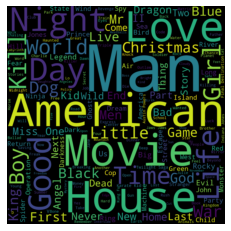

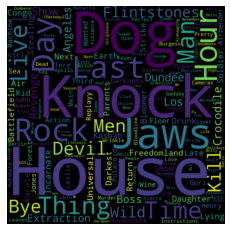

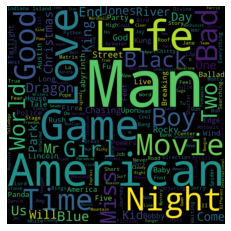

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
all_movies_text = " ".join(netflix_plus_rt_df["title"].tolist())

bad_movies = audience_rating_df = netflix_plus_rt_df.dropna(subset="audience_rating")
bad_movies = bad_movies[bad_movies["audience_rating"] <= 30]
bad_movies_text = " ".join(bad_movies["title"].tolist())

good_movies = audience_rating_df = netflix_plus_rt_df.dropna(subset="audience_rating")
good_movies = good_movies[good_movies["audience_rating"] >= 70]
good_movies_text = " ".join(good_movies["title"].tolist())

# Create the wordcloud objects
side=1060
all_movies_wordcloud = WordCloud(width=side, height=side, margin=0).generate(all_movies_text)
bad_movies_wordcloud = WordCloud(width=side, height=side, margin=0).generate(bad_movies_text)
good_movies_wordcloud = WordCloud(width=side, height=side, margin=0).generate(good_movies_text)


# Display the generated images:
plt.imshow(all_movies_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

plt.imshow(bad_movies_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

plt.imshow(good_movies_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=10, y=10)
plt.show()


In [61]:
ignored_words = ["the", "of", "a", "in", "i", "am", "and", "to", "me", "for", "&"]

bad_movies_word_array = bad_movies_text.split(" ")
bad_movies_word_array = [word.lower() for word in bad_movies_word_array]
bad_movies_word_array = [word for word in bad_movies_word_array if not word in ignored_words]

good_movies_word_array = good_movies_text.split(" ")
good_movies_word_array = [word.lower() for word in good_movies_word_array]
good_movies_word_array = [word for word in good_movies_word_array if not word in ignored_words]

uniquely_good_words_array = [word for word in good_movies_word_array if not word in bad_movies_word_array]
uniquely_bad_words_array = [word for word in bad_movies_word_array if not word in good_movies_word_array]

bad_words = px.histogram(
  uniquely_bad_words_array,
).update_xaxes(categoryorder="total descending")

good_words = px.histogram(
  uniquely_good_words_array,
).update_xaxes(categoryorder="total descending")

bad_words.show()
good_words.show()

In [ ]:
from plotly_wordcloud import plotly_wordcloud as pwc
from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected=True)

iplot(pwc(all_movies_text))
iplot(pwc(bad_movies_text))
iplot(pwc(good_movies_text))